# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow



In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
# https://pytorch.org/docs/stable/nn.html torch.nn documents
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

* Excel speadsheet

* Images of any kind

* Videos (Yotube has lots of data),

* Audio like songs or podcasts

* DNA

* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation

2. Build a model to learn patterns in that numerical representation

To showcase this,let's create *know* data using the linear regression formula.


We'll use a linear regression formula to make a straight line with *known* **parameters**

In [ ]:
# Linear regression formula
# Y = a +bX
# Create *known* parameters
weight = 0.7# b
bias = 0.3# a

# Create
start = 0
end = 1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1) # input
y = bias + weight*X # output

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in yellow
  plt.scatter(test_data,test_labels,c="y",s=4,label="Testing data")

  # Are predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  # Show the lagend
  plt.legend(prop={"size":14});

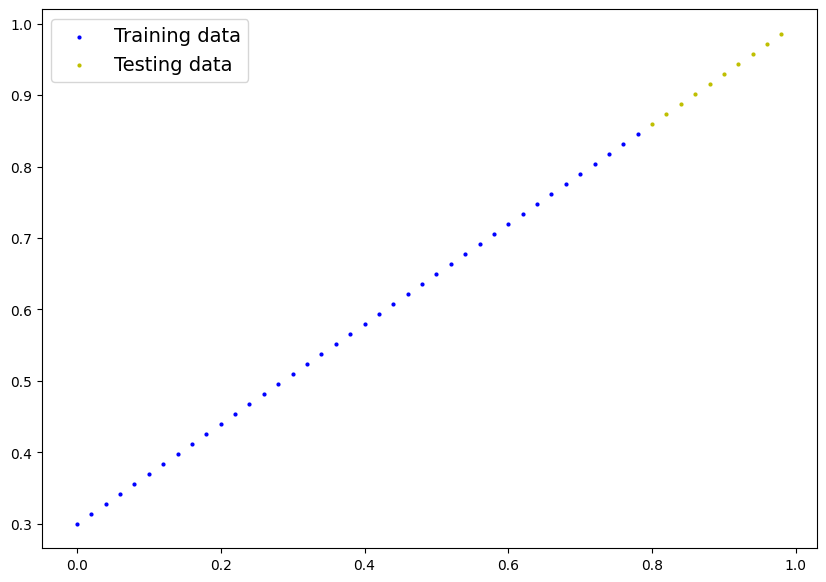

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:

* Start with random values(weight & bias)

* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Throught two main algorithms
1. Gradient descent

2. Backpropagation

* Turkçesi modelimiz rasgele sayılarla başlayacak ve gradient descent kullanarak (weight & bias) parametrelerini günceller



In [ ]:
#import torch.nn as nn
#import torch.nn.functional as F

#class Model(nn.Module):
    #def __init__(self):
        #super().__init__()
        #self.conv1 = nn.Conv2d(1, 20, 5)
        #self.conv2 = nn.Conv2d(20, 20, 5)

    #def forward(self, x):
       # x = F.relu(self.conv1(x))
        #return F.relu(self.conv2(x))

In [ ]:
from torch import nn # nn sinir ağları yapı taşı katmanıdır sinir ağı modelidir
# Create linear regression model class
class LinearRegressionModel(nn.Module):# ınheritance  yani kalıtım başka bir sınıfın fonksyiyonlarını kalıtım yolu ile alıyoruz
  # -< almost everything in PyTorch inherhits from nn.Module(PyTorch hemen hemen her şey nn.Module den miras alır) yani bir  herhangi bir PyTorch modeli oluşturmak istersek
  # Bu sınıftan kalıtım almak zorundayız
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,# <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,# if requires_grad=True model use gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
    # forward() defines the computation in the model modeldeki hesaplamayı tanımlar
  def forward(self,x:torch.Tensor) -> torch.Tensor:#<- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula
    # forward() methodu bizim kulanımımızda doğrusal regresyon fonksiyonudur

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computationel graphs (another word for neural network can be considered a computationel)

* torch.nn.Parameter - what parameters should our model try and learn,often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules,if you subclass it you should overwrite forward()

* torch.optim - this where the optimizers in PyTorch live they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(),this method defines what happend in the forward computation
turkish:Tüm nn.Module alt sınıfları, forward() fonksiyonunu geçersiz kılmanızı gerektirir bu method ileriye dönük hesaplamada ne olacağını tanımlar

extra resources:https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model,let's see what's inside

So we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(45)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-1.1224], requires_grad=True),
 Parameter containing:
 tensor([0.0312], requires_grad=True)]

These are model parameters

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-1.1224])), ('bias', tensor([0.0312]))])

In [ ]:
weight,bias

(0.7, 0.3)

### Making prediction using torch.inference_mode()

To check our model's predictive power,let's see how well it predicts y_test based on X_test.

When we pass data through our model,it's going to run it through the forward() method.

Modelimizden veri geçirdiğimizde, onu forward() yöntemiyle çalıştıracağız.


In [ ]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds=model_0(X_test)
y_preds

tensor([[-0.8667],
        [-0.8892],
        [-0.9116],
        [-0.9341],
        [-0.9565],
        [-0.9790],
        [-1.0014],
        [-1.0239],
        [-1.0463],
        [-1.0687]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():#
  #The difference between the prediction above is that we ran the model with
  #requires_grad=False, meaning we turned off gradient tracking. The upside of this is that it entails tracking less data.

  #bu modu kulanarak modelimizi tahmin yaptırdık X_test datasını verip y_preds sonuçlarını bulduk
  #yukarıdki tahmin arasındaki fark bu mode requires_grad=False olrak çalıştırır yani gradyan izlemyi kapatır bunun iyi tarafı daha az veriyi takip ettiği anlamına gelir
  y_preds = model_0(X_test)

y_preds

# You can also do something similar with torch.no_grad(), however torch.infrence_mode() is preferred
#with torch.no_grad():
  #y_preds=model_0(X_test)

# documentation:https://pytorch.org/docs/stable/generated/torch.inference_mode.html

tensor([[-0.8667],
        [-0.8892],
        [-0.9116],
        [-0.9341],
        [-0.9565],
        [-0.9790],
        [-1.0014],
        [-1.0239],
        [-1.0463],
        [-1.0687]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

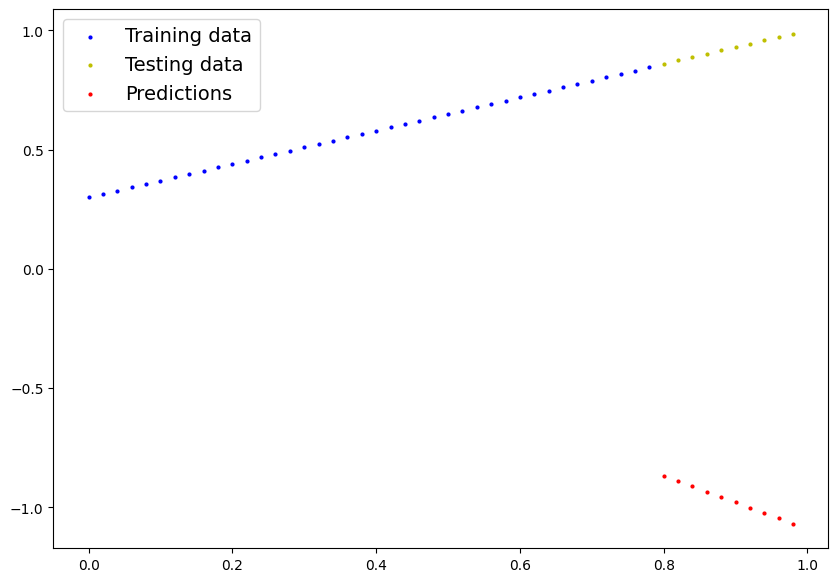

In [ ]:
plot_predictions(predictions=y_preds)

## 3.Train model

The whole idea of training is for a model to move from some *unknown* parameters (these maybe random) to some *know* parameters

or in other words from a poor representation of the data to better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note:Loss function may also be called cost function or criterion in different areas.For our case,we're going to refer to it as a loss function

Thinks we need to train

* **Loss function:** A function to measure how wrong your model's predictions are the ideal outputs,lower is better

* **optimizer:** Takes into account the loss of a model and adjust the model's parameters(e.g weight & bias )

********************************************************************************
Eğitimin bütün amacı, bir modelin bazı bilinmeyen parametrelerden (bunlar belki rastgele olabilir) bazı bilinen parametrelere doğru hareket etmesidir. Başka bir deyişle, verilerin zayıf bir temsilinden daha iyi bir temsile doğru ilerlemektir.

Modelinizin tahminlerinin ne kadar kötü veya yanlış olduğunu ölçmenin bir yolu, bir kayıp fonksiyonu kullanmaktır.

* Not: Farklı alanlarda kayıp fonksiyonu farklı isimlerle anılabilir. Bizim durumumuzda, ona bir kayıp fonksiyonu olarak atıfta bulunacağız.

* **Kayıp Fonksiyonu:** Modelinizin tahminlerinin ideal çıktılara ne kadar yanlış olduğunu ölçen bir fonksiyon, daha düşük değer daha iyidir.

* **optimizer:** Bir modelin kaybını hesaba katar ve modelin parametrelerini ayarlar

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([-1.1224], requires_grad=True),
 Parameter containing:
 tensor([0.0312], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([-1.1224])), ('bias', tensor([0.0312]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent )
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

# Loss fonksiyonu ve optimizer kurduk bir sonraki adım eğitim döngüsü oluşturmak

In [ ]:
loss_fn

L1Loss()

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data

1. Forward pass (this involes data moving through our model's forward() functions) to make predictions on te data - also called propagation

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward - move backwards through the network to calculate the gradients of easch of the parameters of uyr model with respect to the loss (**backpropagation**)

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)
********************************************************************************
0. Veri üzerinde döngü oluştur.

1. İleri geçiş (bu, modelimizin forward() fonksiyonları üzerinden verinin hareket etmesini içerir) veri üzerinde tahminler yapmak için - ayrıca yayılma olarak da adlandırılır.

2. Kaybı hesapla (ileri geçiş tahminlerini gerçek etiketlerle karşılaştır).

3. Optimizer gradyanlarını sıfırla.

4. Kaybı geriye yay - ağı geriye doğru hareket ettirerek modelimizin parametrelerinin her birinin kayıpla ilgili olarak gradyanlarını hesapla (geriye yayılma).

5. Optimizer adımı - modelimizin parametrelerini ayarlamak için optimizerı kullanarak kaybı iyileştirmeye çalışın (gradyan inişi).

In [ ]:
# An epoch is one loop through the data (this is a hyperparameter because we've set it ourselves)
epochs = 200
train_loss_values = []
test_loss_values = []
epoch_count = []
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyToch sets all parameters that require gradients to require gradients

  # 1.Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad() # eğer sıfırlama yapmasaydık döngü 1 den 0 giderken sürekli artacaktı 1,2,3,....

  # 4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward() # geri yayılım bu adımda olur

  # 5.Step the optimizer (perform gradient descent)
  optimizer.step() # varsayılan olarak optimize edicinin nasıdl değişeceğini belirtir döngü boyunca

  # öreğin geri yayılım ağın girşine girdiler verilir ve çıktı bulunur bu çıktıdan modelin loss fonksiyonu hesplanır ve ağda geriye doğru işlem başlar
  # ve loss fonksiyonunu azaltmak için parametrelerin güncelenmesi gerekir parametrelerin güncelendiği yer burasıdı

  ### Testing   Put the model in evaluation mode
  model_0.eval() # turns off gradient tracking

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes burada gradyan_inişini kaptamamızın sebebi modelimiz yukarıda
  # kalıpları öğrendi biz sadece burada test edeceğiz yani test ederken model bir şey öğrenmeyecek
  # 1.Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

  # Print out model state_dict()
  print(model_0.state_dict())

Loss:0.01299344189465046
Epoch: 0 | MAE Train Loss: 0.01299344189465046 | MAE Test Loss: 0.029932236298918724 
OrderedDict([('weights', tensor([0.6370])), ('bias', tensor([0.3262]))])
Loss:0.012655806727707386
OrderedDict([('weights', tensor([0.6388])), ('bias', tensor([0.3257]))])
Loss:0.012306807562708855
OrderedDict([('weights', tensor([0.6406])), ('bias', tensor([0.3252]))])
Loss:0.011968233622610569
OrderedDict([('weights', tensor([0.6422])), ('bias', tensor([0.3242]))])
Loss:0.011621607467532158
OrderedDict([('weights', tensor([0.6440])), ('bias', tensor([0.3237]))])
Loss:0.011279222555458546
OrderedDict([('weights', tensor([0.6455])), ('bias', tensor([0.3227]))])
Loss:0.010936407372355461
OrderedDict([('weights', tensor([0.6473])), ('bias', tensor([0.3222]))])
Loss:0.010590208694338799
OrderedDict([('weights', tensor([0.6489])), ('bias', tensor([0.3212]))])
Loss:0.01025120448321104
OrderedDict([('weights', tensor([0.6507])), ('bias', tensor([0.3207]))])
Loss:0.00990220345556736


1. Epoch (Dönem) Belirleme: epochs değişkeni, veri kümesinin kaç kez geçileceğini belirler. Burada, sadece bir dönem (epochs = 1) belirlenmiş.

2. Model Eğitimi Döngüsü: Her bir epoch için aşağıdaki adımların gerçekleştirileceği bir döngü başlatılır.a. Modeli Eğitim Moduna Ayarlama: model_0.train() çağrısı, modelin eğitim moduna geçmesini sağlar. Eğitim modunda, modelin tüm parametreleri (ağırlıklar ve bias'lar gibi) için gradyanlar hesaplanır.b. İleri Yayılım (Forward Pass): Eğitim verileri (X_train) modelden geçirilir ve tahminler (y_pred) elde edilir.c. Kayıp Hesaplama: Gerçek etiketlerle (y_train) tahmin edilen etiketler (y_pred) arasındaki kayıp (hata) hesaplanır.d.

3. Optimizatörün Gradyanları Sıfırlama: Her epoch başında, optimizatörün (örneğin, SGD veya Adam) gradyanları sıfırlanır

4. Geri Yayılım (Backpropagation) ve Parametre Güncelleme: Hesaplanan kayıp değeri kullanılarak, modelin parametrelerinin gradyanı hesaplanır ve bu gradyanlar kullanılarak parametreler güncellenir (gradient iniş algoritması kullanılarak).f.

5. Modeli Değerlendirme Moduna Ayarlama: model_0.eval() çağrısı, modelin değerlendirme moduna geçmesini sağlar. Bu modda, gradyan izleme kapatılır, bu da modelin eğitim için artık gradyanları izlemediği anlamına gelir. Bu, sadece modelin performansını değerlendirmek için kullanılır.
Bu kod parçası, bir modelin eğitimi için tipik bir döngüyü temsil eder: veri üzerinden geç, gradyanları hesapla, gradyan inişi ile parametreleri güncelle. Bu süreç, modelin verilere uyum sağlamasını ve performansını arttırmasını sağlar.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6941])), ('bias', tensor([0.3047]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

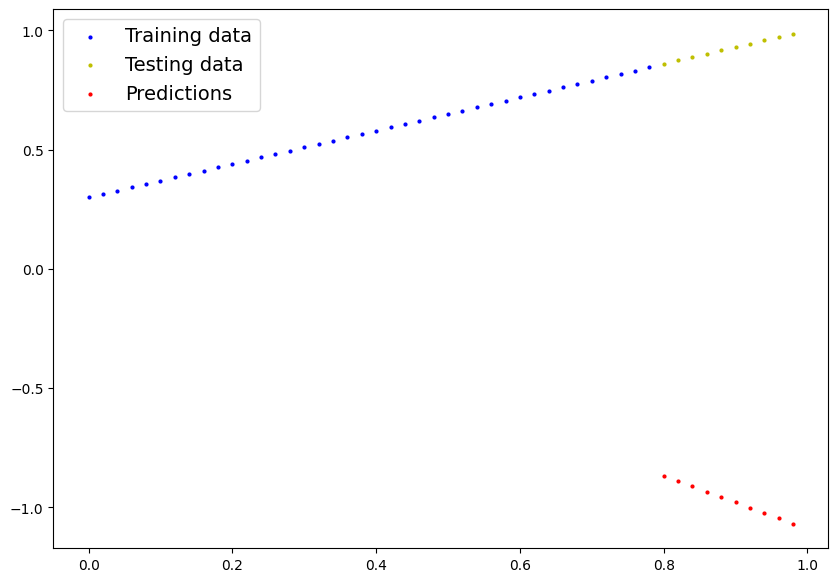

In [ ]:
plot_predictions(predictions=y_preds)

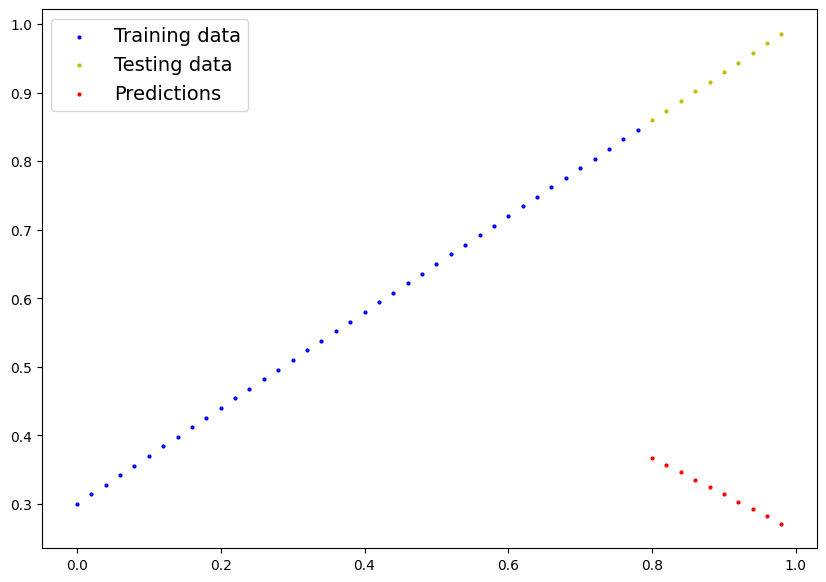

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
epoch_count,train_loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [array(0.9795493, dtype=float32),
  array(0.86433905, dtype=float32),
  array(0.7491288, dtype=float32),
  array(0.63690245, dtype=float32),
  array(0.5466416, dtype=float32),
  array(0.4765709, dtype=float32),
  array(0.4232108, dtype=float32),
  array(0.38305312, dtype=float32),
  array(0.3527957, dtype=float32),
  array(0.3295353, dtype=float32),
  array(0.31238797, dtype=float32),
  array(0.2990611, dtype=float32),
  array(0.28865796, dtype=float32),
  array(0.28027776, dtype=float32),
  array(0.27366087, dtype=float32),
  array(0.26816863, dtype=float32),
  array(0.26312253, dtype=float32),
  array(0.2588142, dtype=float32),
  array(0.2548142, dtype=float32),
  array(0.25081426, dtype=float32)],
 [array(1.877264, dtype=float32),
  array(1.7425537, dtype=float32),
  array(1.6078432, dtype=float32),
  array(1.475133, dtype=float32),
  array(1.3551986, dt

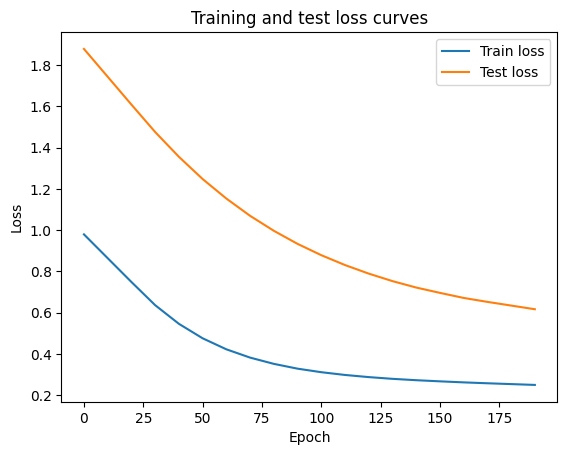

In [ ]:
# Plot the loss curves
plt.plot(epoch_count,train_loss_values,label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss ")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();